In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from  sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Utilisateur\Downloads\Cells.csv', sep=';')
df.sample(3)

,Unnamed: 0,case,class,angle_ch_1,area_ch_1,avg_inten_ch_1,avg_inten_ch_2,avg_inten_ch_3,avg_inten_ch_4,convex_hull_area_ratio_ch_1,...,spot_fiber_count_ch_3,spot_fiber_count_ch_4,total_inten_ch_1,total_inten_ch_2,total_inten_ch_3,total_inten_ch_4,var_inten_ch_1,var_inten_ch_3,var_inten_ch_4,width_ch_1
849,850,Train,PS,"45,8688621647379",331,"66,9018987341772","111,041139240506","107,889240506329","66,7341772151899","1,69219219219219",...,5,6,21141,34774,34093,21088,"61,3813551160976","130,367143723847","69,8207395217281","21,9133831736042"
21,22,Test,PS,"80,5548274096692",1060,"59,3053359683794","39,7075098814229","29,9347826086957","22,5909090909091","1,07376058041112",...,7,26,60017,39173,30294,22862,"47,888835488168","23,3152839583707","24,7728940778371","35,0115220206645"
1054,1055,Test,PS,"138,774607298164",163,"50,0448717948718","83,0833333333333","93,7884615384615","208,544871794872","1,24545454545455",...,2,5,7807,12806,14631,32533,"31,2980590347475","86,5275270869738","169,610237314576","12,9952034965535"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    2019 non-null   int64 
 1   case                          2019 non-null   object
 2   class                         2019 non-null   object
 3   angle_ch_1                    2019 non-null   object
 4   area_ch_1                     2019 non-null   int64 
 5   avg_inten_ch_1                2019 non-null   object
 6   avg_inten_ch_2                2019 non-null   object
 7   avg_inten_ch_3                2019 non-null   object
 8   avg_inten_ch_4                2019 non-null   object
 9   convex_hull_area_ratio_ch_1   2019 non-null   object
 10  convex_hull_perim_ratio_ch_1  2019 non-null   object
 11  diff_inten_density_ch_1       2019 non-null   object
 12  diff_inten_density_ch_3       2019 non-null   object
 13  diff_inten_density

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\1886712886.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='class', data =df ,palette='pastel')


<Axes: xlabel='class', ylabel='count'>

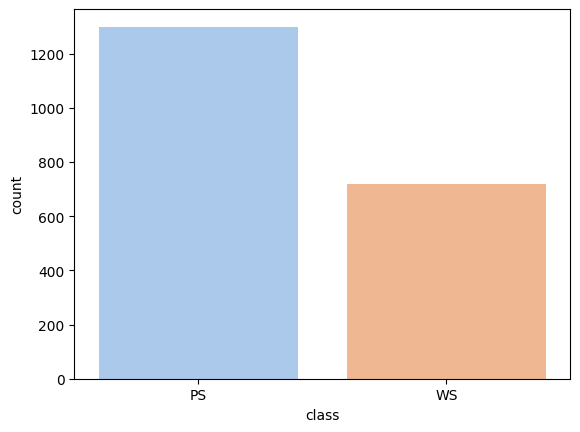

In [7]:
sns.countplot(x ='class', data =df ,palette='pastel')

In [9]:
df.isnull().sum()
#on remarque que y a pas des valeurs manquantes µ

Unnamed: 0                      0
case                            0
class                           0
angle_ch_1                      0
area_ch_1                       0
avg_inten_ch_1                  0
avg_inten_ch_2                  0
avg_inten_ch_3                  0
avg_inten_ch_4                  0
convex_hull_area_ratio_ch_1     0
convex_hull_perim_ratio_ch_1    0
diff_inten_density_ch_1         0
diff_inten_density_ch_3         0
diff_inten_density_ch_4         0
entropy_inten_ch_1              0
entropy_inten_ch_3              0
entropy_inten_ch_4              0
eq_circ_diam_ch_1               0
eq_ellipse_lwr_ch_1             0
eq_ellipse_oblate_vol_ch_1      0
eq_ellipse_prolate_vol_ch_1     0
eq_sphere_area_ch_1             0
eq_sphere_vol_ch_1              0
fiber_align_2_ch_3              0
fiber_align_2_ch_4              0
fiber_length_ch_1               0
fiber_width_ch_1                0
inten_cooc_asm_ch_3             0
inten_cooc_asm_ch_4             0
inten_cooc_con

In [11]:
df.nunique().sort_values(ascending=False)

Unnamed: 0                      2019
eq_ellipse_prolate_vol_ch_1     2019
inten_cooc_asm_ch_4             2019
inten_cooc_contrast_ch_4        2019
inten_cooc_entropy_ch_3         2019
inten_cooc_entropy_ch_4         2019
kurt_inten_ch_1                 2019
kurt_inten_ch_3                 2019
kurt_inten_ch_4                 2019
length_ch_1                     2019
neighbor_avg_dist_ch_1          2019
neighbor_var_dist_ch_1          2019
shape_bfr_ch_1                  2019
skew_inten_ch_1                 2019
skew_inten_ch_3                 2019
skew_inten_ch_4                 2019
var_inten_ch_1                  2019
var_inten_ch_3                  2019
var_inten_ch_4                  2019
inten_cooc_asm_ch_3             2019
inten_cooc_contrast_ch_3        2019
width_ch_1                      2019
diff_inten_density_ch_4         2019
avg_inten_ch_3                  2019
convex_hull_perim_ratio_ch_1    2019
eq_ellipse_oblate_vol_ch_1      2019
eq_ellipse_lwr_ch_1             2019
a

In [13]:
# Sélection des variables importantes
names_columns = df.select_dtypes(include=['int64']).columns
names_columns = list(names_columns) + ['case','class']
df = df[names_columns]
df

,Unnamed: 0,area_ch_1,spot_fiber_count_ch_3,spot_fiber_count_ch_4,total_inten_ch_1,total_inten_ch_2,total_inten_ch_3,total_inten_ch_4,case,class
0,1,185,1,5,2781,701,1690,392,Test,PS
1,2,819,4,12,24964,160998,54675,128368,Train,PS
2,3,431,2,7,11552,47511,26344,43959,Train,WS
3,4,298,4,8,5545,28870,8042,8843,Train,PS
4,5,285,1,8,6603,30306,5569,11037,Test,PS
...,...,...,...,...,...,...,...,...,...,...
2014,2015,302,1,7,12150,6783,41481,67431,Train,PS
2015,2016,607,5,14,22506,11942,45456,47676,Test,PS
2016,2017,204,1,7,7384,1170,11659,28906,Test,PS
2017,2018,390,2,4,17025,63084,55017,126118,Test,WS


In [15]:
# Codage des variables qualitatives
df['case'] = df['case'].replace({'Test' : 0 , 'Train' : 1})
df['class'] = df['class'].replace({'WS' : 0 , 'PS' : 1})
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\2461113484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['case'] = df['case'].replace({'Test' : 0 , 'Train' : 1})
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\2461113484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'WS' : 0 , 'PS' : 1})


,Unnamed: 0,area_ch_1,spot_fiber_count_ch_3,spot_fiber_count_ch_4,total_inten_ch_1,total_inten_ch_2,total_inten_ch_3,total_inten_ch_4,case,class
0,1,185,1,5,2781,701,1690,392,0,1
1,2,819,4,12,24964,160998,54675,128368,1,1
2,3,431,2,7,11552,47511,26344,43959,1,0
3,4,298,4,8,5545,28870,8042,8843,1,1
4,5,285,1,8,6603,30306,5569,11037,0,1
...,...,...,...,...,...,...,...,...,...,...
2014,2015,302,1,7,12150,6783,41481,67431,1,1
2015,2016,607,5,14,22506,11942,45456,47676,0,1
2016,2017,204,1,7,7384,1170,11659,28906,0,1
2017,2018,390,2,4,17025,63084,55017,126118,0,0


In [17]:
seed = 44
X = df.drop('class',axis=1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.4, random_state=seed , stratify=y)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test , test_size= 0.5, random_state=44 , stratify=y_test)

In [19]:
y.value_counts(normalize=True)

class
1    0.643883
0    0.356117
Name: proportion, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

class
1    0.643564
0    0.356436
Name: proportion, dtype: float64

In [23]:
y_val.value_counts(normalize=True)

class
1    0.643564
0    0.356436
Name: proportion, dtype: float64

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\3734418053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class' , data=df ,palette='pastel')


<Axes: xlabel='class', ylabel='count'>

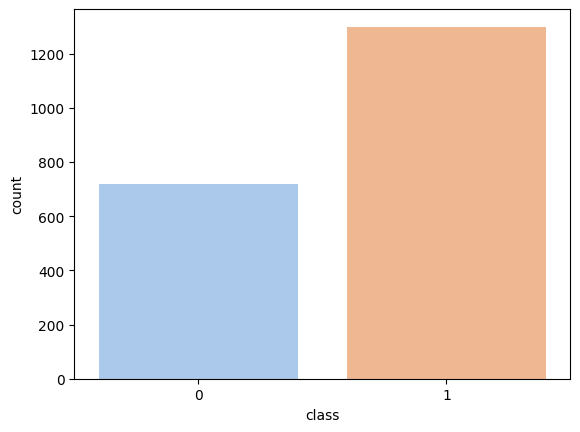

In [25]:
# On remarque que les proportions des valeurs sont préservées.
# Il faut que les deux classes de la variable class soient réparties à 50 % pour chaque catégorie
sns.countplot(x='class' , data=df ,palette='pastel')

In [26]:
# Pour cela, on utilise la méthode de sur-échantillonnage pour équilibrer les deux classes.
from sklearn.utils import resample 

X2 = X_train
X2['class'] = y_train.values
X2.head()

,Unnamed: 0,area_ch_1,spot_fiber_count_ch_3,spot_fiber_count_ch_4,total_inten_ch_1,total_inten_ch_2,total_inten_ch_3,total_inten_ch_4,case,class
1712,1713,295,1,7,8993,50064,2574,17081,0,0
1490,1491,270,3,8,10137,38434,12086,14524,1,1
1574,1575,238,1,8,17240,88634,27185,23610,0,1
1104,1105,329,1,6,15841,79003,25461,72775,1,1
1514,1515,265,1,7,39428,41092,82609,105074,1,1


In [29]:
minority = X2[X2["class"] == 0]
majority = X2[X2["class"] == 1]
print('Le shape de majority est :', majority.shape)
print('Le shape de majority est :', minority.shape)

Le shape de majority est : (780, 10)
Le shape de majority est : (431, 10)


In [31]:
 minority_up_simple = resample(minority,replace=True,n_samples= len(majority))
minority_up_simple.shape

(780, 10)

In [33]:
upsampled = pd.concat([majority,minority_up_simple])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\631069608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class' , data=upsampled ,palette='pastel')


<Axes: xlabel='class', ylabel='count'>

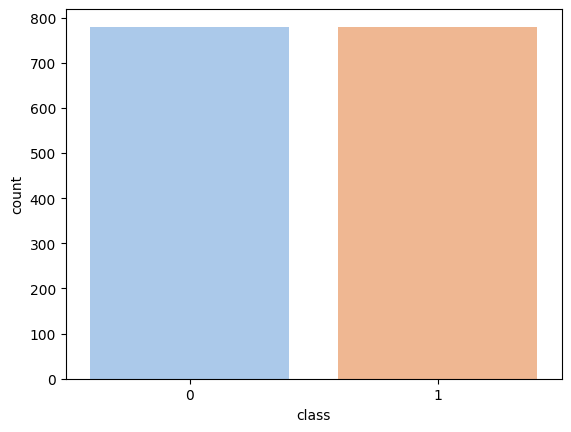

In [35]:
sns.countplot(x='class' , data=upsampled ,palette='pastel')

In [37]:
X_train_up = upsampled.drop(['class'],axis=1)
y_train_up = upsampled['class']

In [39]:
# modélisation
# selection des variables importants 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=44)
rf.fit(X_train_up,y_train_up)
accuracy_score(y_val,rf.predict(X_val))

0.7722772277227723

In [40]:
#selectioner les variables importants 
vars_imprt = pd.Series(rf.feature_importances_,index=X_train_up.columns).sort_values(ascending=False)
vars_imprt
#On peut laisser les variables, car elles ont toutes une influence sur la variable cible.
#Par contre, on remarque que la variable total_inten_ch_2 a trop d'importance pour prédire notre variable cible.

total_inten_ch_2         0.341508
total_inten_ch_1         0.209020
total_inten_ch_4         0.103588
total_inten_ch_3         0.092168
area_ch_1                0.084174
Unnamed: 0               0.083122
spot_fiber_count_ch_4    0.045462
spot_fiber_count_ch_3    0.031351
case                     0.009606
dtype: float64

<Axes: xlabel='None', ylabel='None'>

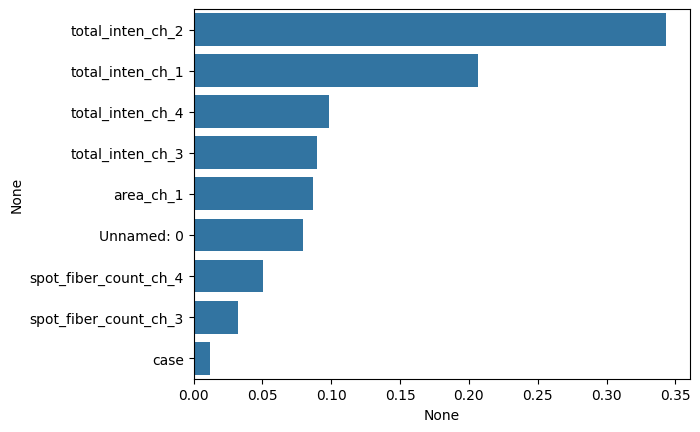

In [43]:
sns.barplot(x = vars_imprt , y=vars_imprt.index)

In [47]:
# Regression logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=seed,solver='liblinear', max_iter=500)
lr_hyp = {"C" : [0.001,0.01,0.1,1,1,100,500]}
lr_cv = GridSearchCV(lr,lr_hyp,cv = 5)
lr_cv.fit(X_train_up,y_train_up)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)
print(lr_cv.best_params_)

0.7365384615384616
LogisticRegression(C=0.001, max_iter=500, random_state=44, solver='liblinear')
{'C': 0.001}


In [64]:
#forret aléatoire 
RF = RandomForestClassifier(random_state=44)
#chercher le nombre ideale d'arbre 
RF_hyp = {'n_estimators' : [5,10,20,50,100,200],'max_depth' : [None,2,5,10,15,20]}
RF_cv = GridSearchCV(RF,RF_hyp,cv=5)
RF_cv.fit(X_train_up,y_train_up)
print(RF_cv.best_score_)
print(RF_cv.best_estimator_)
print(RF_cv.best_params_)


0.8807692307692309
RandomForestClassifier(max_depth=20, n_estimators=200, random_state=44)
{'max_depth': 20, 'n_estimators': 200}


In [68]:
#Baggin Clasifier 
from sklearn.ensemble import BaggingClassifier 
bc = BaggingClassifier(random_state=44)
bc_hyp = {'n_estimators' : [5,10,20,50,100,200]}
bc_cv = GridSearchCV(bc,bc_hyp,cv=5)
bc_cv.fit(X_train_up,y_train_up)
print(bc_cv.best_score_)
print(bc_cv.best_estimator_)
print(bc_cv.best_params_)

0.8756410256410255
BaggingClassifier(n_estimators=200, random_state=44)
{'n_estimators': 200}


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_hyper = {'n_neighbors': [1,3, 5, 7, 10,15,20,50,100] ,'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan'] }
knn_cv = GridSearchCV(knn, knn_hyper, cv=5)
knn_cv.fit(X_train_up, y_train_up)
print(knn_cv.best_score_)
print(knn_cv.best_estimator_)
print(knn_cv.best_params_)


0.8570512820512821
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=44)
gb_hyper = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 6, 10]}
gb_cv = GridSearchCV(gb, gb_hyper, cv=5)
gb_cv.fit(X_train_up, y_train_up)
print(gb_cv.best_score_)
print(gb_cv.best_estimator_)
print(gb_cv.best_params_)

0.8814102564102564
GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=200,
                           random_state=44)
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200}


In [60]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(algorithm='SAMME',random_state=44)
ab_hyper = {'n_estimators': [150, 200,300], 'learning_rate': [1,5,10]}
ab_cv = GridSearchCV(ab, ab_hyper, cv=5)
ab_cv.fit(X_train_up, y_train_up)
print(ab_cv.best_score_)
print(ab_cv.best_estimator_)
print(ab_cv.best_params_)

0.8166666666666668
AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=200,
                   random_state=44)
{'learning_rate': 1, 'n_estimators': 200}


In [94]:
def model_evaluations(model, X_val, y_val):
    # Prédiction sur les données de validation
    y_pred = model.predict(X_val)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Retourner les métriques
    return accuracy, precision, recall, f1

In [98]:
# on remarque que le model de Bagging Classifier est le milleur 
# Stocker les résultats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# Liste des noms des modèles
model_names = ["Logistic Regression", "Random Forest", "KNN", "Bagging Classifier", "Gradient Boosting", "AdaBoost"]

# Boucle sur les modèles
for name, model in zip(model_names, models):
    print(f"Model: {name}")
    
    # Obtenir les métriques
    accuracy, precision, recall, f1 = model_evaluations(model, X_val, y_val)
    
    # Ajouter les résultats dans la liste
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1})

# Convertir en DataFrame
df_results = pd.DataFrame(results)

# Afficher les résultats sous forme de tableau
print(df_results)

Model: Logistic Regression
Model: Random Forest
Model: KNN
Model: Bagging Classifier
Model: Gradient Boosting
Model: AdaBoost
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.727723   0.864078  0.684615  0.763948
1        Random Forest  0.769802   0.843621  0.788462  0.815109
2                  KNN  0.735149   0.790875  0.800000  0.795411
3   Bagging Classifier  0.772277   0.841463  0.796154  0.818182
4    Gradient Boosting  0.747525   0.801527  0.807692  0.804598
5             AdaBoost  0.754950   0.877934  0.719231  0.790698


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16624\2371253999.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")


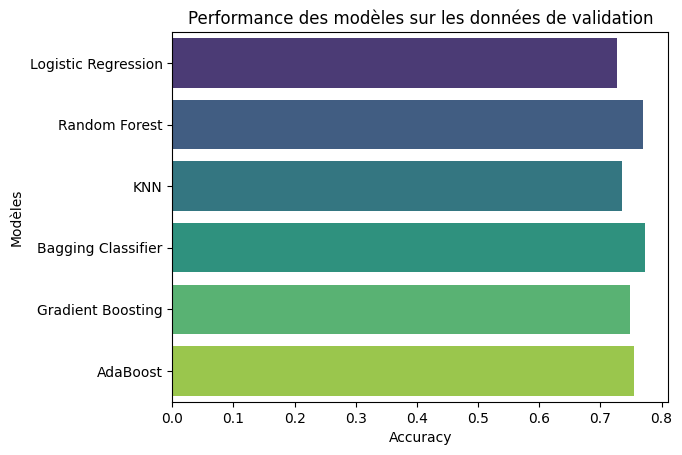

In [100]:
sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")

plt.title("Performance des modèles sur les données de validation")
plt.xlabel("Accuracy")
plt.ylabel("Modèles")
plt.show()
# on remarque que le bagging clasifier et random forest qont les meilleus models 

In [102]:
# validation des deux algorthm avec les données de test 
print("l'accuracy  de bagging Classifier est : " , accuracy_score(y_test,bc_cv.best_estimator_.predict(X_test)))
print("l'accuracy  de Random Forest est : " , accuracy_score(y_test,RF_cv.best_estimator_.predict(X_test)))

l'accuracy  de bagging Classifier est :  0.7920792079207921
l'accuracy  de Random Forest est :  0.7970297029702971


#### **Résumé du Travail Réalisé**  

1. **Prétraitement des Données**  
   - Sélection des **variables les plus pertinentes** pour l'analyse.  
   - Encodage des **variables catégorielles** afin de les rendre exploitables par les algorithmes de Machine Learning.  
   - **Gestion du déséquilibre des classes cibles** : mise en place de techniques comme le **suréchantillonnage** ou le **sous-échantillonnage** pour équilibrer les classes avant l'entraînement des modèles.  

2. **Partition des Données**  
   - Séparation du jeu de données en trois ensembles :  
     - **Entraînement (60%)** : utilisé pour ajuster les modèles.  
     - **Validation (20%)** : utilisé pour optimiser les hyperparamètres et comparer les modèles.  
     - **Test (20%)** : utilisé pour évaluer la performance finale du meilleur modèle.  

3. **Modélisation & Optimisation**  
   - Expérimentation avec **six algorithmes de classification**.  
   - Optimisation des hyperparamètres via **une recherche par validation croisée (5-fold Cross Validation)**.  

4. **Évaluation & Sélection du Modèle**  
   - Comparaison des performances des modèles sur l’ensemble de validation.  
   - Classement des modèles en fonction de plusieurs métriques (Accuracy, Précision, Recall, F1-score).  

5. **Validation Finale**  
   - Test du meilleur modèle sur l’ensemble de test afin d’obtenir une **évaluation objective et généralisable**.  

### **Conclusion**  
L’approche adoptée garantit une **sélection rigoureuse du modèle optimal**, en évitant le surapprentissage et en assurant une **bonne généralisation sur de nouvelles données**, tout en prenant en compte le **déséquilibre des classes cibles** pour améliorer les performances des modèles sur des jeux de données déséquilibrés. 🚀
